<h1><center>Übungszettel 6</center></h1>
<h2><center>Inhaltsbasierte Bild- und Videoanalyse - SoSe 19</center></h2>
<h3><center>Abgabe: Di. 02.07.2019 - 12:00 Uhr</center></h3>

# CNNs in Tensorflow (2+3+4+3+3 Punkte)

In dieser Aufgabe soll ein neuronales Netz zur Klassifizierung von Bildern basierend
auf dem CIFAR-10-Datensatz (https://www.cs.toronto.edu/~kriz/cifar.html)realisiert werden. Dazu soll die Tensorflow API Keras (https://keras.io/) verwendet werden.

Der Datensatz besteht aus einem Trainings- und einem Testdatensatz. 

In [1]:
from __future__ import print_function
# -*- coding: utf-8 -*-
%matplotlib inline

import numpy as np

from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import TensorBoard

np.random.seed(1000)

Using TensorFlow backend.


### a)  Preprocessing (2 Punkte)
Laden Sie zunächst die Trainings- und Testdaten des CIFAR-10 Dataset herunter. Nutzen Sie dafür `keras.datasets.cifar`. Berechnen Sie dann das Meanbild und ziehen es von den Bildern in den Datasets ab. Teilen Sie jeden Input-Wert durch 128.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
(x_train_og, y_train_og), (x_test_og, y_test_og) = cifar10.load_data()

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
import matplotlib.pyplot as plt

x_train_mean_image = np.mean(x_train, axis=0, dtype='uint8')
x_test_mean_image = np.mean(x_test, axis=0, dtype='uint8')

x_train -= x_train_mean_image
x_train = x_train / 128

x_test -= x_test_mean_image
x_test = x_test / 128

"""
y_train_mean_image = np.mean(y_train, axis=0, dtype='uint8')
y_test_mean_image = np.mean(y_test, axis=0, dtype='uint8')

y_train -= y_train_mean_image
y_train = y_train / 128

y_test -= y_test_mean_image
y_test = y_test / 128
"""

"\ny_train_mean_image = np.mean(y_train, axis=0, dtype='uint8')\ny_test_mean_image = np.mean(y_test, axis=0, dtype='uint8')\n\ny_train -= y_train_mean_image\ny_train = y_train / 128\n\ny_test -= y_test_mean_image\ny_test = y_test / 128\n"

### b)  Netzwerkarchitektur entwerfen (3 Punkte)
Erzeugen Sie nun eine Netzwerkarchitektur die für Bilder aus dem CIFAR-10 Dataset Wahrscheinlichkeiten für 10 Klassen vorhersagt. Bauen Sie das Modell nach folgenden folgende Vorgaben:
* Convolutional Layer: Aktivierung: ReLU, Kernel: 3x3, Padding: 1
* Pooling-Size: 2x2
* Struktur:
    - Input: 32x32x3
    
    - Convolution (32 Filter)
    - Batch Normalization
    - Convolution (64 Filter)
    - Batch Normalization
    - Max-Pooling
    
    - Convolution (128 Filter)
    - Batch Normalization
    - Max-Pooling
    
    - Convolution (128 Filter)
    - Batch Normalization
    - Max-Pooling
    
    - Fully-Connected (256 Neuronen)
    - Dropout (0.5)
    - Batch Normalization
    - Fully-Connected, 10 Outputs, Softmax-Aktivierung
    
Geben Sie auch die Struktur des Modells mit `model.summary()` aus.

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

W0702 12:02:36.186821  7840 deprecation_wrapper.py:119] From e:\pythons\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 12:02:36.199817  7840 deprecation_wrapper.py:119] From e:\pythons\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 12:02:36.201817  7840 deprecation_wrapper.py:119] From e:\pythons\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0702 12:02:36.222811  7840 deprecation_wrapper.py:119] From e:\pythons\python37\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0702 12:02:36.223810  7840 deprecation_wrapper.py:119] From e:\pythons\pyth

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 128)       512       
__________

### c)  Training (4 Punkte)
Trainieren Sie nun das Netz mit Stochastic Gradient Descent auf dem Trainingsdatensatz.
Nutzen Sie dafür das Nesterov Verfahren und setzen Sie sinnvolle Werte für Batchsize und Startlernrate.

Verwenden Sie Callbacks für TensorBoard (mit Bildern und Graph) und ReduceLROnPlateau (mögliche Werte: factor=0.1, patience=3, min_delta=0.001, min_lr=0.0001). 
Trainieren Sie das Modell für mindestens 10 Epochen. Nach etwa 50-100 Epochen sollten Sie gute Ergebnisse erhalten.
Binden Sie ein Bild der Losskurve in dieses Notebook ein.
Vergessen Sie nicht, das Modell zu speichern. Fügen Sie das gespeicherte (finale) Modell ihrer Abgabe hinzu.

In [7]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

tbCallBack = TensorBoard(log_dir='./Graph', histogram_freq=1, write_graph=True, write_images=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001, min_delta=0.001, verbose=1)

model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test), 
          callbacks=[tbCallBack, reduce_lr])

model.save('CNN.h5')

W0702 12:02:36.597699  7840 deprecation_wrapper.py:119] From e:\pythons\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Train on 50000 samples, validate on 10000 samples


W0702 12:02:38.219213  7840 deprecation_wrapper.py:119] From e:\pythons\python37\lib\site-packages\keras\callbacks.py:796: The name tf.summary.histogram is deprecated. Please use tf.compat.v1.summary.histogram instead.

W0702 12:02:38.225211  7840 deprecation_wrapper.py:119] From e:\pythons\python37\lib\site-packages\keras\callbacks.py:840: The name tf.summary.image is deprecated. Please use tf.compat.v1.summary.image instead.

W0702 12:02:38.326181  7840 deprecation_wrapper.py:119] From e:\pythons\python37\lib\site-packages\keras\callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0702 12:02:38.329180  7840 deprecation_wrapper.py:119] From e:\pythons\python37\lib\site-packages\keras\callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Epoch 1/10
50000/50000 [==============================] - 298s 6ms/step - loss: 0.0839 - val_loss: 0.0648
Epoch 2/10
50000/50000 [==============================] - 292s 6ms/step - loss: 0.0648 - val_loss: 0.0545
Epoch 3/10
50000/50000 [==============================] - 291s 6ms/step - loss: 0.0560 - val_loss: 0.0512
Epoch 4/10
50000/50000 [==============================] - 290s 6ms/step - loss: 0.0502 - val_loss: 0.0485
Epoch 5/10
50000/50000 [==============================] - 280s 6ms/step - loss: 0.0464 - val_loss: 0.0439
Epoch 6/10
50000/50000 [==============================] - 276s 6ms/step - loss: 0.0433 - val_loss: 0.0408
Epoch 7/10
50000/50000 [==============================] - 281s 6ms/step - loss: 0.0407 - val_loss: 0.0397
Epoch 8/10
50000/50000 [==============================] - 275s 6ms/step - loss: 0.0386 - val_loss: 0.0393
Epoch 9/10
50000/50000 [==============================] - 278s 6ms/step - loss: 0.0367 - val_loss: 0.0374
Epoch 10/10
50000/50000 [=====================

### c)  Testen (3 Punkte)
Laden Sie das zuvor trainierte Modell. Evaluieren Sie nun das Modell auf den Testdaten.  

In [8]:
from keras.models import load_model

model = load_model('CNN.h5')

loss = model.evaluate(x_test, y_test, batch_size=32)

print('Test loss:', loss)

10000/10000 [==============================] - 14s 1ms/step
Test accuracy: 0.037474050933122637


### d)  Anwenden (3 Punkte)
Laden Sie das zuvor trainierte Modell. Wenden Sie das Modell auf 10 zufällig ausgewählte Bilder aus dem Testdatensatz an. Visualisieren Sie die Ergebnisse. Geben Sie dazu das Bild aus und die vorhergesagte Wahrscheinlichkeite für jede der 10 Klassen.

10/10 [==============================] - 0s 14ms/step
predicted probability: [5.3668435e-04 9.6349693e-05 3.1125488e-05 5.6250609e-04 6.0787715e-04
 7.7480688e-03 3.8745424e-05 9.8793864e-01 1.7243836e-05 2.4227740e-03]


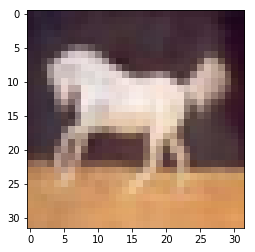


predicted probability: [8.2022663e-05 2.2327884e-03 4.0149558e-07 3.8541959e-05 3.3029546e-06
 2.6848709e-04 3.5116289e-05 3.5539040e-05 1.9955434e-05 9.9728382e-01]


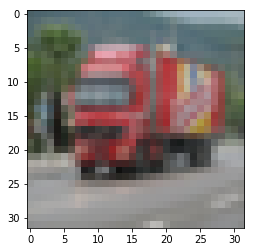


predicted probability: [0.33008832 0.03452847 0.00139274 0.04719206 0.0054895  0.03011356
 0.00185788 0.00275849 0.44708207 0.09949691]


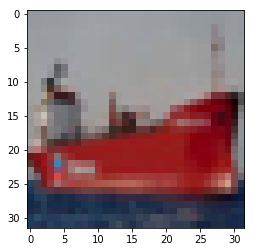


predicted probability: [3.2572374e-03 5.6985527e-04 1.1520165e-02 5.7855773e-01 1.6124746e-02
 2.4632417e-01 7.7318788e-02 5.8745321e-02 1.6669739e-03 5.9151151e-03]


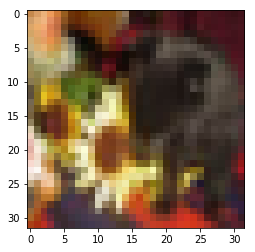


predicted probability: [2.3743303e-03 5.9892228e-03 6.9339178e-05 3.5480689e-03 8.7131874e-04
 5.4710254e-04 1.3416029e-03 8.1161555e-04 1.8873695e-02 9.6557373e-01]


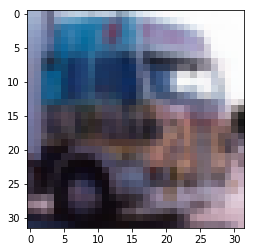


predicted probability: [2.8647878e-03 1.7812444e-02 1.0223482e-02 5.7203649e-04 3.3312280e-02
 4.1051891e-02 2.8157656e-03 8.8807952e-01 1.9158474e-04 3.0761694e-03]


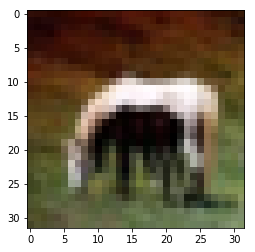


predicted probability: [0.01007134 0.00053046 0.02848075 0.48292103 0.01705514 0.3723021
 0.0062042  0.04817377 0.03303422 0.00122698]


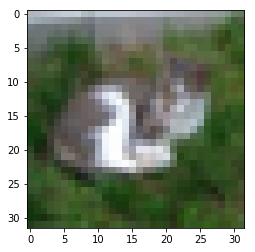


predicted probability: [5.60048223e-02 6.45741180e-04 9.20170825e-03 2.59167373e-01
 6.87781023e-03 1.16102606e-01 3.49273003e-04 8.58735964e-02
 6.32568169e-03 4.59451318e-01]


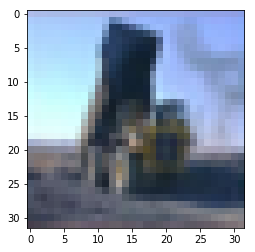


predicted probability: [7.7112787e-04 4.3068940e-04 3.0078064e-03 3.2544095e-02 7.1077514e-03
 5.9027725e-01 2.6099649e-04 3.6426938e-01 3.1267096e-05 1.2996822e-03]


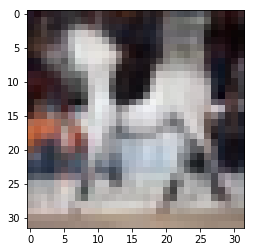


predicted probability: [3.8291435e-04 1.5826861e-03 3.6033827e-05 1.4552368e-04 4.4165316e-04
 3.0431886e-05 1.3005449e-05 9.9653268e-01 3.6440819e-05 7.9854968e-04]


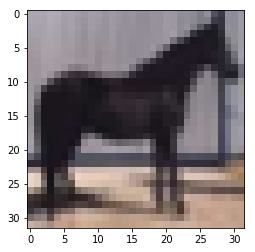

In [9]:
indices = np.array(np.random.uniform(0,10000,(10)), dtype=np.int)
rand_10_pics = x_test[indices]

original_x_test_random_10 = x_test_og[indices]

predicted_probs = model.predict(rand_10_pics, batch_size=10, verbose=1)

for i in range(len(rand_10_pics)):
    print("predicted probability:", predicted_probs[i])
    plt.imshow(np.array(original_x_test_random_10[i], np.int))
    plt.show()
    print()

    